In [143]:
from preprocessing import *

In [144]:
df, X_train, X_valid, y_train, y_valid = preprocessing()

In [ ]:
# df = pd.read_csv('/Users/woojinheo/Desktop/github/SHAP/data/train.csv', index_col=0)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     103904 no

In [7]:
for col in df.columns:
    if df[col].dtype==object:
        print('\n',df[col].value_counts(normalize=True))


 Gender
Female    0.507459
Male      0.492541
Name: proportion, dtype: float64

 Customer Type
Loyal Customer       0.817322
disloyal Customer    0.182678
Name: proportion, dtype: float64

 Type of Travel
Business travel    0.689627
Personal Travel    0.310373
Name: proportion, dtype: float64

 Class
Business    0.477989
Eco         0.449886
Eco Plus    0.072124
Name: proportion, dtype: float64

 satisfaction
neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: proportion, dtype: float64


# catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# data load
# X = df.drop(columns=['id','satisfaction'], axis=1)
# y = df['satisfaction']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
categorical_columns = []

# model train
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, cat_features=categorical_columns)
model.fit(X_train, y_train, eval_set=(X_valid, y_valid), verbose=10)

# prediction
y_pred = model.predict(X_valid)

# accuracy
print(f"Accuracy: {accuracy_score( )}")

0:	learn: 0.5634155	test: 0.5636544	best: 0.5636544 (0)	total: 5.58ms	remaining: 552ms
10:	learn: 0.1937039	test: 0.1962954	best: 0.1962954 (10)	total: 59.8ms	remaining: 484ms
20:	learn: 0.1533918	test: 0.1570972	best: 0.1570972 (20)	total: 150ms	remaining: 564ms
30:	learn: 0.1325801	test: 0.1371400	best: 0.1371400 (30)	total: 206ms	remaining: 460ms
40:	learn: 0.1241582	test: 0.1291394	best: 0.1291394 (40)	total: 262ms	remaining: 377ms
50:	learn: 0.1162103	test: 0.1217112	best: 0.1217112 (50)	total: 314ms	remaining: 302ms
60:	learn: 0.1093543	test: 0.1152225	best: 0.1152225 (60)	total: 368ms	remaining: 235ms
70:	learn: 0.1059842	test: 0.1122873	best: 0.1122873 (70)	total: 426ms	remaining: 174ms
80:	learn: 0.1032461	test: 0.1098248	best: 0.1098248 (80)	total: 478ms	remaining: 112ms
90:	learn: 0.1011841	test: 0.1080098	best: 0.1080098 (90)	total: 531ms	remaining: 52.5ms
99:	learn: 0.0983191	test: 0.1054247	best: 0.1054247 (99)	total: 580ms	remaining: 0us

bestTest = 0.1054247138
bestIter

In [149]:
import pickle

# # save model
with open('/Users/woojinheo/Desktop/github/SHAP/models/catboost_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# load model
# with open('/Users/woojinheo/Desktop/github/SHAP/models/catboost_model.pkl', 'rb') as file:
#     model = pickle.load(file)


In [150]:
# cat boost explainer - feature importance
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,20,27.141590
1,2,26.967365
2,7,8.650940
3,19,7.669060
4,13,4.546935
5,8,3.994020
6,12,2.912675
7,21,2.810194
8,9,2.538830
9,14,2.263181


# decision tree

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Encode categorical features
# categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
# df_ = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# # Target column transformation
# df_['satisfaction'] = df_['satisfaction'].map({"neutral or dissatisfied": 0, "satisfied": 1})

In [ ]:
# data load
# X = df_.drop(columns=['id','satisfaction'], axis=1)
# y = df_['satisfaction']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
# model train
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# prediction
y_pred = dt_model.predict(X_valid)

# accuracy
accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


In [153]:
# # save model
with open('/Users/woojinheo/Desktop/github/SHAP/models/decision_tree_model.pkl', 'wb') as file:
    pickle.dump(dt_model, file)

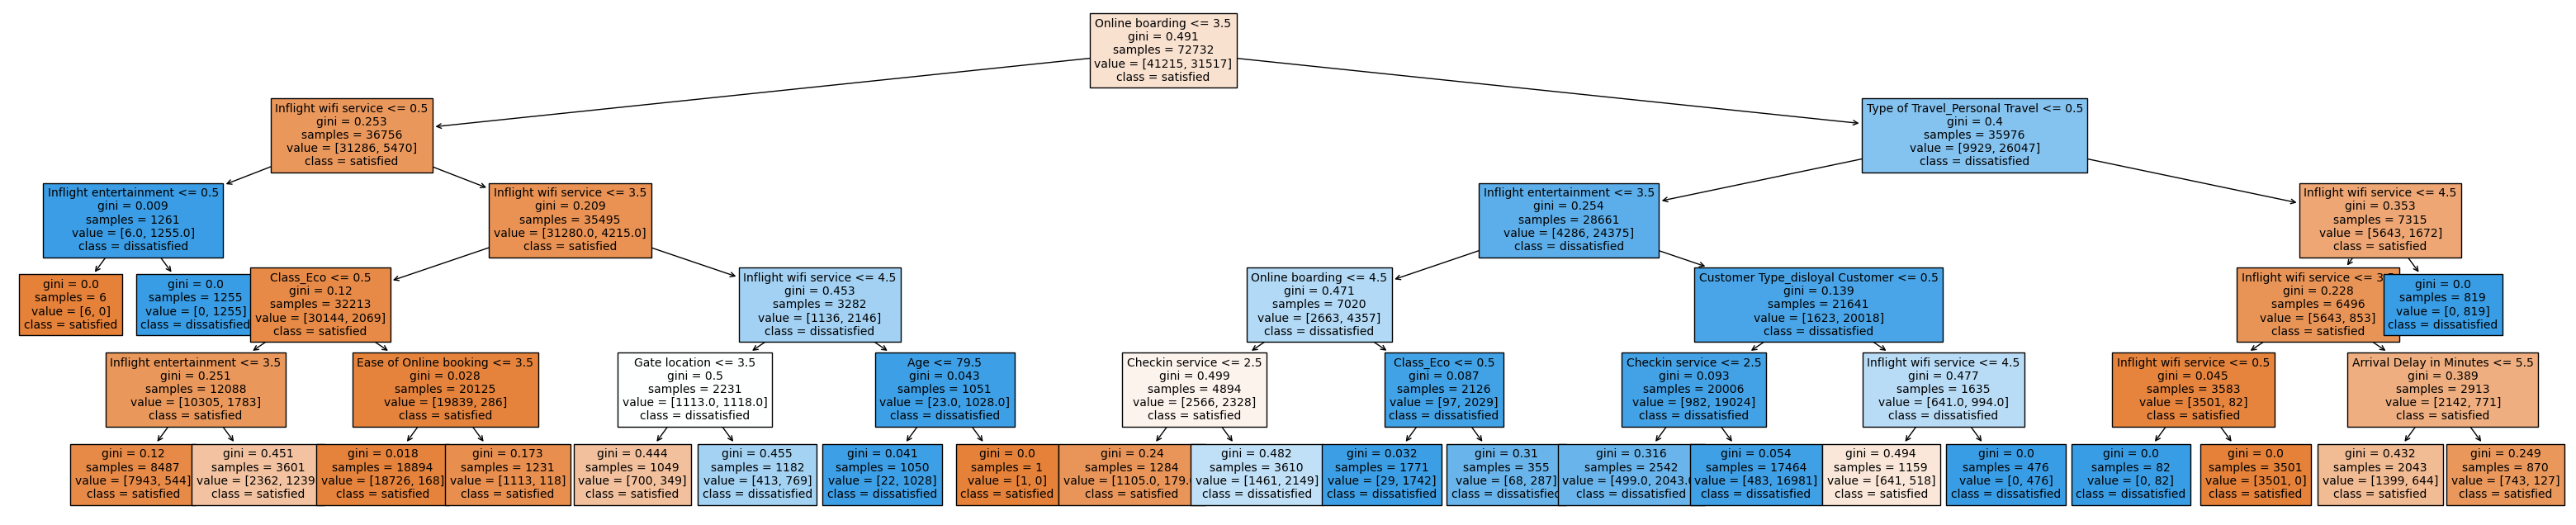

In [154]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Decision Tree visualization
plt.figure(figsize=(40, 8))
plot_tree(dt_model, feature_names=X.columns.tolist(), class_names=['satisfied','dissatisfied'], filled=True, fontsize=10)
plt.show()

# SHAP

In [ ]:
# import shap
# shap.initjs()

In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

- SHAP global explainer

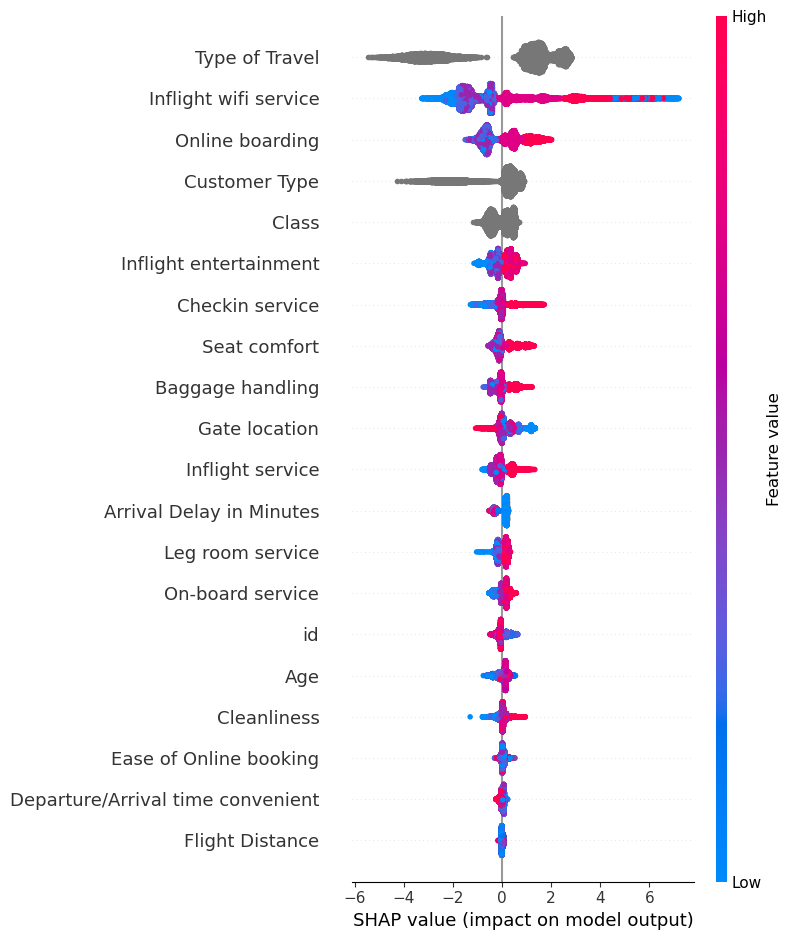

In [ ]:
shap.summary_plot(shap_values, X_test)

- SHAP local explainer

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

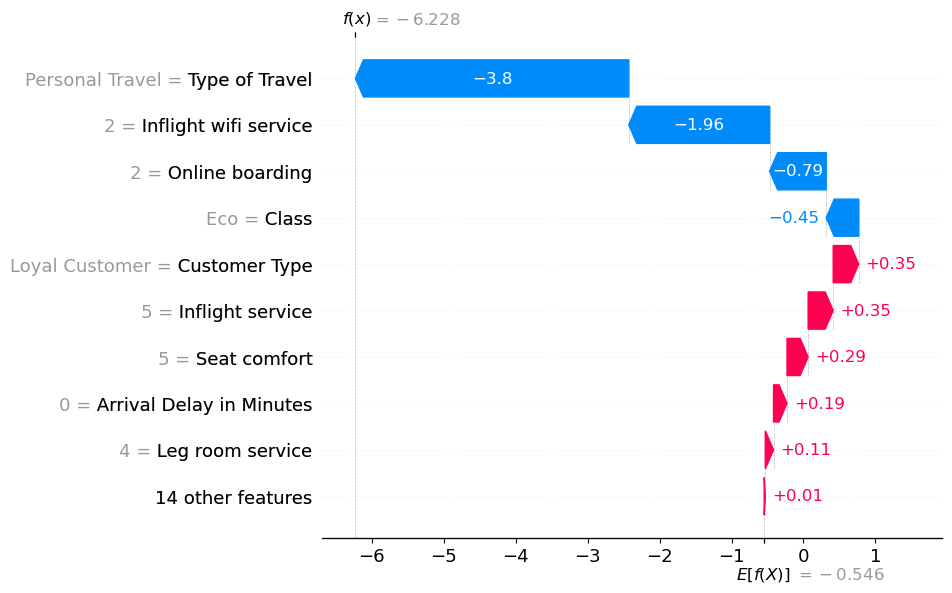

In [ ]:
# individual data point SHAP value Waterfall Plot
shap.plots.waterfall(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X_test.iloc[0]))